In [47]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data= "../data/mouse_drug_data.csv"
clinical_trial_data= "../data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data)
clinical_trial_df = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
ms_ct_cmbd_df = pd.merge(mouse_drug_df, clinical_trial_df, how="inner")

# Display the data table for preview
ms_ct_cmbd_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [48]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# MTV = 'Mean Tumor Volume'
ms_ct_cmbd_df = ms_ct_cmbd_df.set_index('Drug')

TV_grpdby_Drug_and_Timepoint = ms_ct_cmbd_df.loc[['Capomulin','Infubinol','Ketapril','Placebo'],['Timepoint',
                                                  'Tumor Volume (mm3)', 'Metastatic Sites', 'Mouse ID']]

TV_grpdby_Drug_and_Timepoint = TV_grpdby_Drug_and_Timepoint.groupby(['Drug','Timepoint'])

MTV_by_Drug_and_Timepoint = TV_grpdby_Drug_and_Timepoint['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
MTV_by_Drug_and_Timepoint_df = pd.DataFrame(MTV_by_Drug_and_Timepoint)

# Preview DataFrame
MTV_by_Drug_and_Timepoint_df = MTV_by_Drug_and_Timepoint_df.reset_index()
MTV_by_Drug_and_Timepoint_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [49]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
seTV_by_Drug_and_Timepoint = TV_grpdby_Drug_and_Timepoint.sem()
seTV_by_Drug_and_Timepoint = seTV_by_Drug_and_Timepoint['Tumor Volume (mm3)']

# Convert to DataFrame
seTV_by_Drug_and_Timepoint_df = pd.DataFrame(seTV_by_Drug_and_Timepoint)

# Preview DataFrame
seTV_by_Drug_and_Timepoint_df = seTV_by_Drug_and_Timepoint_df.reset_index()
seTV_by_Drug_and_Timepoint_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [50]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [54]:
# Create Pivot Tables with Drugs for Column Headers and Timepoint as Index for both DataFrames
MTV_Pivot = pd.pivot_table(MTV_by_Drug_and_Timepoint_df, index='Timepoint',columns='Drug',
                           values='Tumor Volume (mm3)')



seTV_Pivot = pd.pivot_table(seTV_by_Drug_and_Timepoint_df, index='Timepoint',columns='Drug',
                           values='Tumor Volume (mm3)')


MTV_Pivot = MTV_Pivot.reset_index()
MTV_Pivot

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


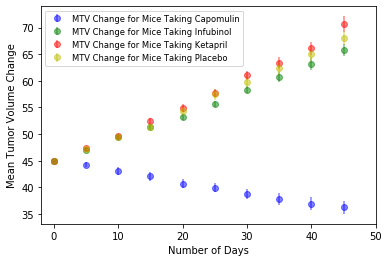

In [92]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(x= MTV_Pivot['Timepoint'],y= MTV_Pivot['Capomulin'], yerr=seTV_Pivot['Capomulin'], fmt="o", color="b",
            alpha=0.5, label="MTV Change for Mice Taking Capomulin")

ax.errorbar(x= MTV_Pivot['Timepoint'],y= MTV_Pivot['Infubinol'], yerr=seTV_Pivot['Infubinol'], fmt="o", color="g",
            alpha=0.5, label="MTV Change for Mice Taking Infubinol")

ax.errorbar(x= MTV_Pivot['Timepoint'],y= MTV_Pivot['Ketapril'], yerr=seTV_Pivot['Ketapril'], fmt="o", color="r",
            alpha=0.5, label="MTV Change for Mice Taking Ketapril")

ax.errorbar(x= MTV_Pivot['Timepoint'],y= MTV_Pivot['Placebo'], yerr=seTV_Pivot['Placebo'], fmt="o", color="y",
            alpha=0.5, label="MTV Change for Mice Taking Placebo")



ax.set_xlim(-2, ((MTV_Pivot['Timepoint']).max())+5)

ax.set_xlabel("Number of Days")
ax.set_ylabel("Mean Tumor Volume Change")

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("../Images/Affects of Drugs on Mean Tumor Volume Change in Mice (45 Days).png")

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [79]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MMS_by_Drug_and_Timepoint = TV_grpdby_Drug_and_Timepoint['Metastatic Sites'].mean()

# Convert to DataFrame
MMS_by_Drug_and_Timepoint_df = pd.DataFrame(MMS_by_Drug_and_Timepoint)

# Preview DataFrame
MMS_by_Drug_and_Timepoint_df = MMS_by_Drug_and_Timepoint_df.reset_index()
MMS_by_Drug_and_Timepoint_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [81]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
seMS_by_Drug_and_Timepoint = TV_grpdby_Drug_and_Timepoint.sem()
seMS_by_Drug_and_Timepoint = seMS_by_Drug_and_Timepoint['Metastatic Sites']

# Convert to DataFrame
seMS_by_Drug_and_Timepoint_df = pd.DataFrame(seMS_by_Drug_and_Timepoint)

# Preview DataFrame
seMS_by_Drug_and_Timepoint_df = seMS_by_Drug_and_Timepoint_df.reset_index()
seMS_by_Drug_and_Timepoint_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [85]:
# Create Pivot Tables with Drugs for Column Headers and Timepoint as Index for both DataFrames
MMS_Pivot = pd.pivot_table(MMS_by_Drug_and_Timepoint_df, index='Timepoint',columns='Drug',
                           values='Metastatic Sites')



seMS_Pivot = pd.pivot_table(seMS_by_Drug_and_Timepoint_df, index='Timepoint',columns='Drug',
                           values='Metastatic Sites')


MMS_Pivot = MMS_Pivot.reset_index()
MMS_Pivot

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


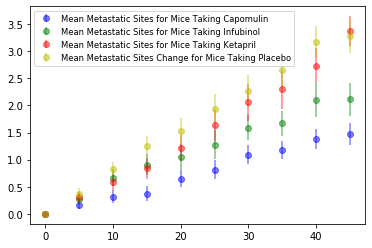

In [94]:
# Generate the Plot (with Error Bars)

fig, ax2 = plt.subplots()

ax2.errorbar(x= MMS_Pivot['Timepoint'],y= MMS_Pivot['Capomulin'], yerr=seMS_Pivot['Capomulin'], fmt="o", color="b",
            alpha=0.5, label="Mean Metastatic Sites for Mice Taking Capomulin")

ax2.errorbar(x= MMS_Pivot['Timepoint'],y= MMS_Pivot['Infubinol'], yerr=seMS_Pivot['Infubinol'], fmt="o", color="g",
            alpha=0.5, label="Mean Metastatic Sites for Mice Taking Infubinol")

ax2.errorbar(x= MMS_Pivot['Timepoint'],y= MMS_Pivot['Ketapril'], yerr=seMS_Pivot['Ketapril'], fmt="o", color="r",
            alpha=0.5, label="Mean Metastatic Sites for Mice Taking Ketapril")

ax2.errorbar(x= MMS_Pivot['Timepoint'],y= MMS_Pivot['Placebo'], yerr=seMS_Pivot['Placebo'], fmt="o", color="y",
            alpha=0.5, label="Mean Metastatic Sites Change for Mice Taking Placebo")



ax.set_xlim(-2, ((MMS_Pivot['Timepoint']).max())+5)

ax.set_xlabel("Number of Days")
ax.set_ylabel("Mean Metastatic Sites")

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)